In [1]:
import pandas as pd
import http.client
from dotenv import load_dotenv
import json
import ast  # To safely evaluate the string as a dictionary
import matplotlib.pyplot as plt
import seaborn as sns

import os
import time

In [ ]:
# now deal with dataframe:

df_1 = pd.read_csv("weather_data_1.csv")

# 1. only select three columns: city, date, temp, weather; 
# 2. replace the columns "{'code': 801, 'icon': 'c02n', 'description': 'Few clouds'}" with {'Few clouds'};
# 3. deal with datetime: only select day rows groubpy city;

df_1 = df_1[["city","datetime", "weather", "temp","app_max_temp","app_min_temp","snow_depth","wind_spd"]]
# Convert the 'weather' column from string to dictionary because now the 'weather' column is not dictionary but string.
df_1["weather"] = df_1["weather"].apply(lambda x: ast.literal_eval(x))

# The apply method is used to apply a function to each element in the column;
# df_1(lambda x: x["weather"] = dic['description'] for dic in x["weather"]) 
df_1["weather"] = df_1["weather"].apply(lambda x: x['description'])    

df_1

,city,datetime,weather,temp,app_max_temp,app_min_temp,snow_depth,wind_spd
0,London,2024-11-23,Overcast clouds,12.1,14.2,9.5,0,7.3
1,London,2024-11-24,Light rain,14.9,15.8,12.8,0,10.3
2,London,2024-11-25,Light rain,9.9,12.2,3.3,0,5.6
3,London,2024-11-26,Light shower rain,6.1,8.3,1.8,0,3.6
4,London,2024-11-27,Light rain,5.0,3.6,-0.3,0,4.7
5,London,2024-11-28,Broken clouds,3.6,4.1,-1.7,0,2.7
6,London,2024-11-29,Broken clouds,5.9,8.0,1.1,0,3.4
7,London,2024-11-30,Overcast clouds,8.3,9.7,3.9,0,4.4
8,London,2024-12-01,Overcast clouds,9.2,10.9,8.3,0,4.7
9,London,2024-12-02,Overcast clouds,8.6,9.7,7.7,0,5.2


In [ ]:
# 3. deal with datetime: only select day rows groubpy city;

# Step 1: change column "datetime" 2024-11-26:09 into 2024-11-26:
df_1["datetime"] = df_1["datetime"].apply(lambda x: x.replace(":"," ",1) + ":00:00")

df_1


C:\Users\taoti\AppData\Local\Temp\ipykernel_19516\21080546.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1["datetime"] = df_1["datetime"].apply(lambda x: x.replace(":"," ",1) + ":00:00")


,city,datetime,temp,weather
0,"London, UK",2024-11-21 18:00:00,31.3,Few clouds
1,"London, UK",2024-11-21 21:00:00,30.6,Few clouds
2,"London, UK",2024-11-22 00:00:00,30.7,Clear Sky
3,"London, UK",2024-11-22 03:00:00,31.1,Clear Sky
4,"London, UK",2024-11-22 06:00:00,32.5,Few clouds
...,...,...,...,...
195,"Madrid, Spain",2024-11-26 03:00:00,47.1,Overcast clouds
196,"Madrid, Spain",2024-11-26 06:00:00,45.7,Overcast clouds
197,"Madrid, Spain",2024-11-26 09:00:00,55.6,Few clouds
198,"Madrid, Spain",2024-11-26 12:00:00,61.2,Scattered clouds


In [8]:
# Step 2: change the column "datetime" string type into datetime type.
df_1["datetime"] = pd.to_datetime(df_1["datetime"])

df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   city      200 non-null    object        
 1   datetime  200 non-null    datetime64[ns]
 2   temp      200 non-null    float64       
 3   weather   200 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 6.4+ KB


C:\Users\taoti\AppData\Local\Temp\ipykernel_19516\554479202.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1["datetime"] = pd.to_datetime(df_1["datetime"])


In [9]:
# Step 3: 
# In pd.Grouper(), "freq" values can be YS, YE, MS, ME, W-MON, D, h, QS, QE
#fil_df_1 = df_1.groupby("city")[].agg("mean")
fil_df_1=pd.DataFrame()

fil_df_1["temp"] = df_1.groupby([pd.Grouper(key="datetime",freq="D"),"city"])["temp"].mean()

fil_df_1

temp
datetime   city                      
2024-11-21 Berlin, Germany  32.700000
           London, UK       30.950000
           Madrid, Spain    52.700000
           Paris, France    31.100000
           Rome, Italy      57.900000
2024-11-22 Berlin, Germany  33.675000
           London, UK       34.700000
           Madrid, Spain    53.387500
           Paris, France    32.912500
           Rome, Italy      57.562500
2024-11-23 Berlin, Germany  34.937500
           London, UK       42.775000
           Madrid, Spain    55.137500
           Paris, France    39.362500
           Rome, Italy      44.900000
2024-11-24 Berlin, Germany  42.550000
           London, UK       56.412500
           Madrid, Spain    54.725000
           Paris, France    54.437500
           Rome, Italy      47.212500
2024-11-25 Berlin, Germany  50.925000
           London, UK       50.087500
           Madrid, Spain    57.037500
           Paris, France    54.200000
           Rome, Italy      52.637500
2024-11-26 Berlin, Germany  48.066667
           London, UK       44.883333
           Madrid, Spain    53.816667
           Paris, France    49.850000
           Rome, Italy      57.133333

In [10]:
fil_df_1.reset_index(inplace=True)

In [11]:
fil_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  30 non-null     datetime64[ns]
 1   city      30 non-null     object        
 2   temp      30 non-null     float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 852.0+ bytes


In [12]:
fil_df_1

,datetime,city,temp
0,2024-11-21,"Berlin, Germany",32.700000
1,2024-11-21,"London, UK",30.950000
2,2024-11-21,"Madrid, Spain",52.700000
3,2024-11-21,"Paris, France",31.100000
4,2024-11-21,"Rome, Italy",57.900000
5,2024-11-22,"Berlin, Germany",33.675000
6,2024-11-22,"London, UK",34.700000
7,2024-11-22,"Madrid, Spain",53.387500
8,2024-11-22,"Paris, France",32.912500
9,2024-11-22,"Rome, Italy",57.562500


In [13]:
fil_df_1["datetime"] = fil_df_1["datetime"].apply(lambda x: x.strftime("%Y-%m-%d"))

In [14]:
fil_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  30 non-null     object 
 1   city      30 non-null     object 
 2   temp      30 non-null     float64
dtypes: float64(1), object(2)
memory usage: 852.0+ bytes


<Axes: xlabel='datetime', ylabel='temp'>

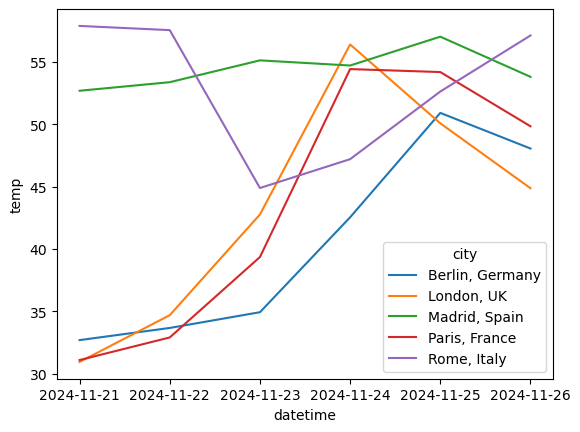

In [15]:
# Visiualization
sns.lineplot(data = fil_df_1, x="datetime",y="temp",hue="city")